IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IMPORTING OUR DATASET

In [3]:
data=pd.read_csv("C:/Users/saksh/Documents/New folder/data (1).csv", encoding = 'latin-1')
data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


CHECKING FOR NULL VALUES

In [5]:
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

NO NULL VALUES

In [7]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


EXPLORATORY DATA ANALYSIS

GROUPING DATA

In [9]:
data.groupby('fail')['footfall'].mean()

fail
0    373.150635
1    212.768448
Name: footfall, dtype: float64

In [11]:
data.groupby('fail')['tempMode'].mean()

fail
0    3.760436
1    3.681934
Name: tempMode, dtype: float64

In [13]:
data.groupby('fail')['AQ'].mean()

fail
0    3.617060
1    5.318066
Name: AQ, dtype: float64

In [15]:
data.groupby('fail')['USS'].mean()

fail
0    3.484574
1    2.175573
Name: USS, dtype: float64

In [17]:
data.groupby('fail')['CS'].mean()

fail
0    5.373866
1    5.422392
Name: CS, dtype: float64

In [19]:
data.groupby('fail')['VOC'].mean()

fail
0    1.312160
1    4.987277
Name: VOC, dtype: float64

In [21]:
data.groupby('fail')['RP'].mean()

fail
0    46.299456
1    48.086514
Name: RP, dtype: float64

In [23]:
data.groupby('fail')['IP'].mean()

fail
0    4.450091
1    4.727735
Name: IP, dtype: float64

DATA VISUALIZATION

In [27]:
corr=data.corr()
corr

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


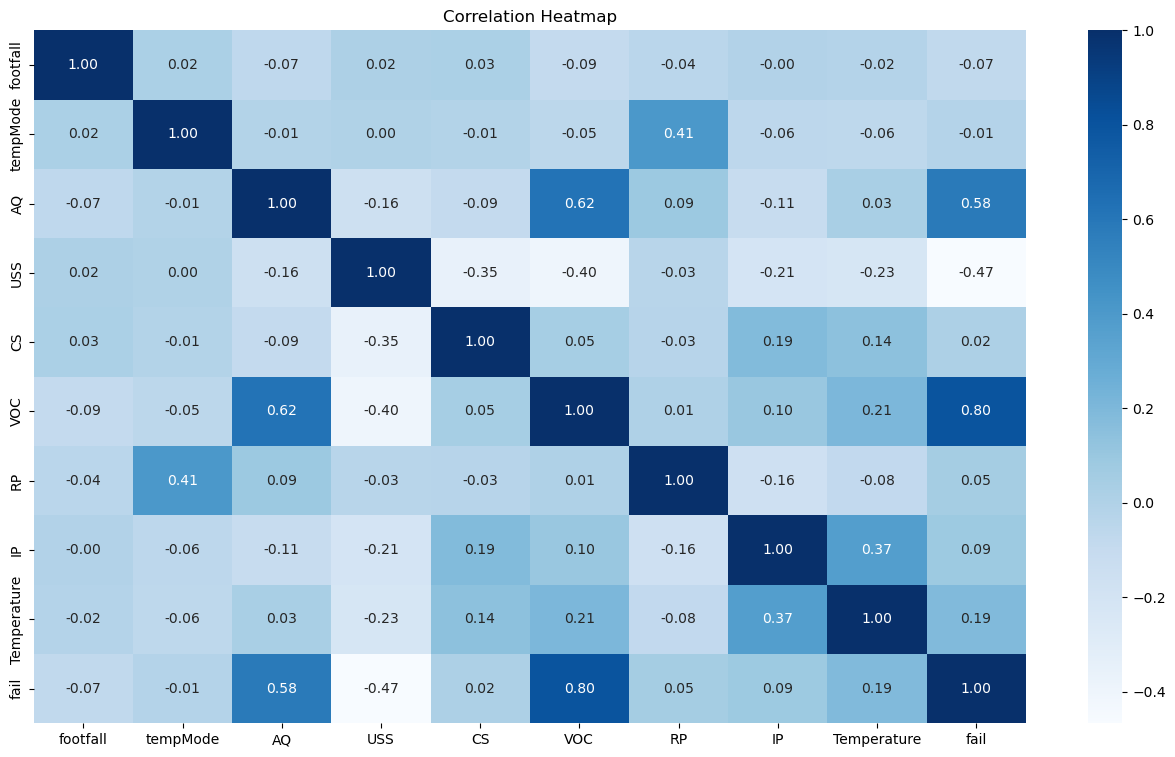

In [64]:
fig = plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True,cmap='Blues', fmt = ".2f")
plt.title("Correlation Heatmap")
fig.savefig('test.png')

SELECTION OF FEATURES

In [31]:
X=data[['AQ','USS','VOC','Temperature']]
Y=data['fail']

SPLITTING THE TRAINING AND TESTING DATA

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [39]:
print(X.shape, x_train.shape, x_test.shape)

(944, 4) (755, 4) (189, 4)


MODEL TRAINING

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9125827814569536
0.9206349206349206


MODEL TESTING

In [60]:
import gradio as gr
def predict(footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature):
    footfall=int(footfall)
    tempMode=int(tempMode)
    AQ=int(AQ)
    USS=int(USS)
    CS=int(CS)
    VOC=int(VOC)
    RP=int(RP)
    IP=int(IP)
    Temperature=int(Temperature)
    features=[[AQ, USS, VOC, Temperature]]
    prediction=model.predict(features)[0]
    if(prediction==1):
        return "Machine has failed (1)"
    else:
        return "Machine is healthy (0)"

demo=gr.Interface(
    fn=predict,
    inputs=[
        "number","number","number","number","number","number","number","number","number"
    ],
    outputs=["text"],
)
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7866

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
